Análisis de la influencia en el tiempo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv("./data/data_globant.csv")

In [18]:
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# Ordenar
df = df.sort_values(["Name", "Date"]).reset_index(drop=True)

C:\Users\suane\AppData\Local\Temp\ipykernel_2508\3958935903.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"], errors="coerce")


In [19]:
df.head()

,Date,Email,Name,Position,Seniority,Location,Studio,Client,Client Tag,Project,Project Tag,Team Name,Engagement,Email Leader,Year,Month,Day
0,2023-01-02,alberto.bravo@tec.globant.com,Alberto Bravo,Data Analyst,Ssr,AR/CABA/BA,Data,EduSmart Systems,EDUSYS,Catalyst Program,CATPRO,Star Wars: The Furry Awakens,3.40,pedro.rodriguez@tec.globant.com,2023,1,2
1,2023-01-03,alberto.bravo@tec.globant.com,Alberto Bravo,Data Analyst,Ssr,AR/CABA/BA,Data,EduSmart Systems,EDUSYS,Catalyst Program,CATPRO,Star Wars: The Furry Awakens,3.62,pedro.rodriguez@tec.globant.com,2023,1,3
2,2023-01-04,alberto.bravo@tec.globant.com,Alberto Bravo,Data Analyst,Ssr,AR/CABA/BA,Data,EduSmart Systems,EDUSYS,Catalyst Program,CATPRO,Star Wars: The Furry Awakens,3.73,pedro.rodriguez@tec.globant.com,2023,1,4
3,2023-01-05,alberto.bravo@tec.globant.com,Alberto Bravo,Data Analyst,Ssr,AR/CABA/BA,Data,EduSmart Systems,EDUSYS,Catalyst Program,CATPRO,Star Wars: The Furry Awakens,4.21,pedro.rodriguez@tec.globant.com,2023,1,5
4,2023-01-06,alberto.bravo@tec.globant.com,Alberto Bravo,Data Analyst,Ssr,AR/CABA/BA,Data,EduSmart Systems,EDUSYS,Catalyst Program,CATPRO,Star Wars: The Furry Awakens,3.91,pedro.rodriguez@tec.globant.com,2023,1,6


In [20]:
unique_names = df["Name"].dropna().unique()
num_people = len(unique_names)
print(num_people)

94


Cada vez se eligen 10 users random para analizar si influye el tiempo mucho

In [21]:
sample_size = min(10, num_people)
sample_names = np.random.choice(unique_names, size=sample_size, replace=False)

In [15]:
print("\nPersonas seleccionadas:")
for n in sample_names:
    print(" -", n)


Personas seleccionadas:
 - Ana Ponce
 - Pedro Ortega
 - Carlos Villanueva
 - Pedro Castaño
 - Andrés Medina
 - Paula Cordero
 - Elena Pérez
 - Miguel Ortega
 - María Díaz
 - Ana Salas


In [ ]:
def get_end_of_month_dates(dates):
    temp = pd.DataFrame({"Date": dates})
    temp["Year"] = temp["Date"].dt.year
    temp["Month"] = temp["Date"].dt.month

    end_days = temp.groupby(["Year", "Month"])["Date"].max().sort_values()
    return [pd.to_datetime(d).to_pydatetime() for d in end_days]

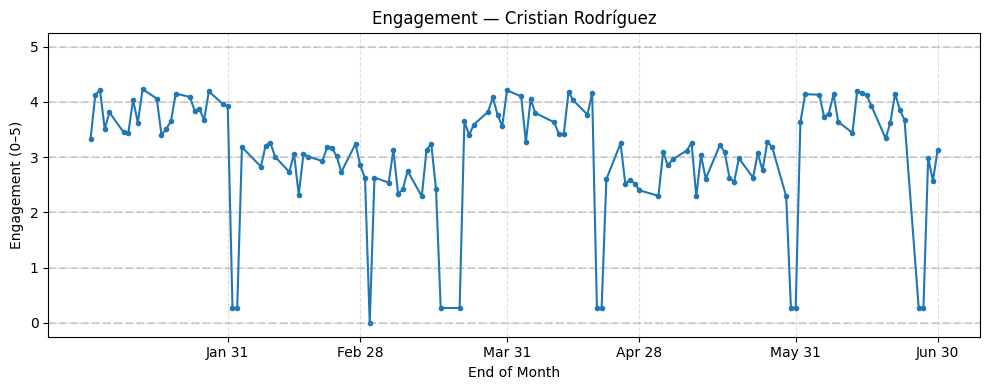

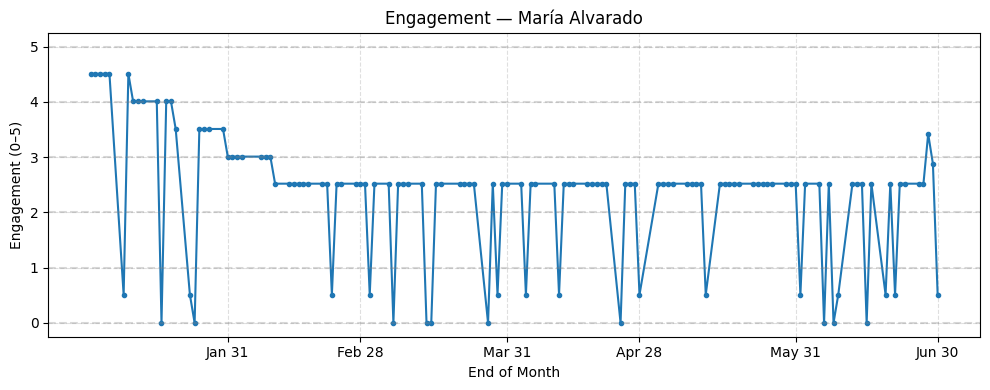

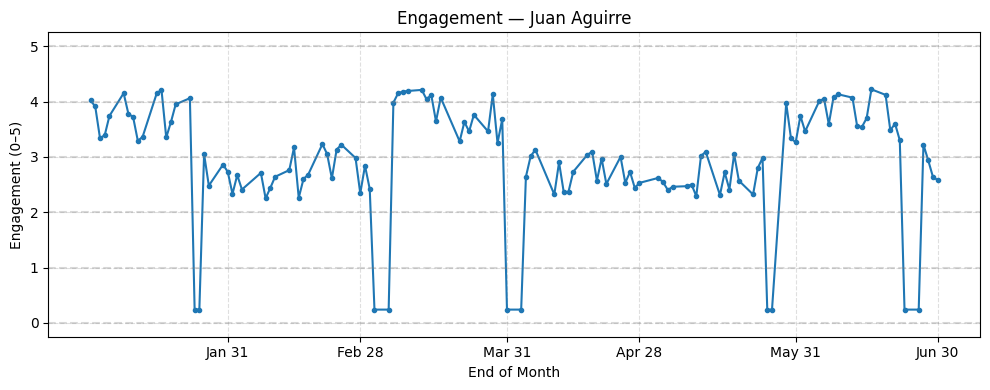

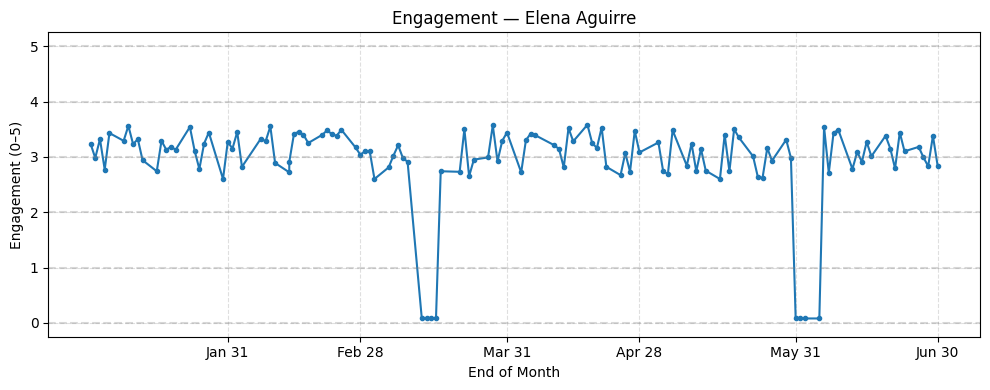

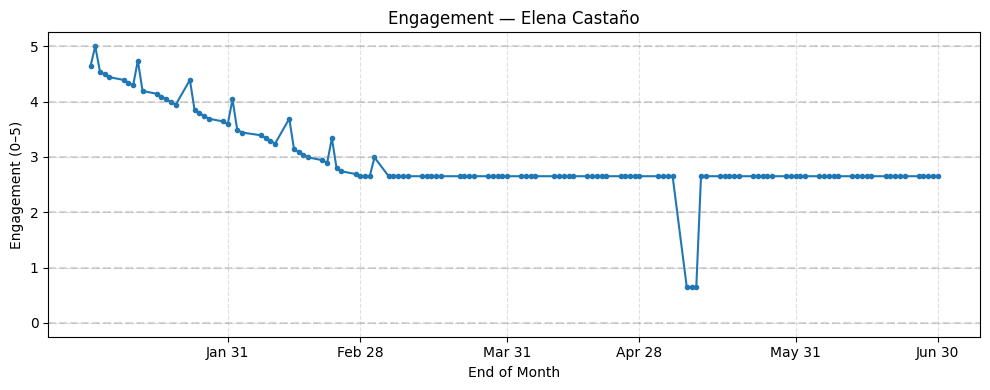

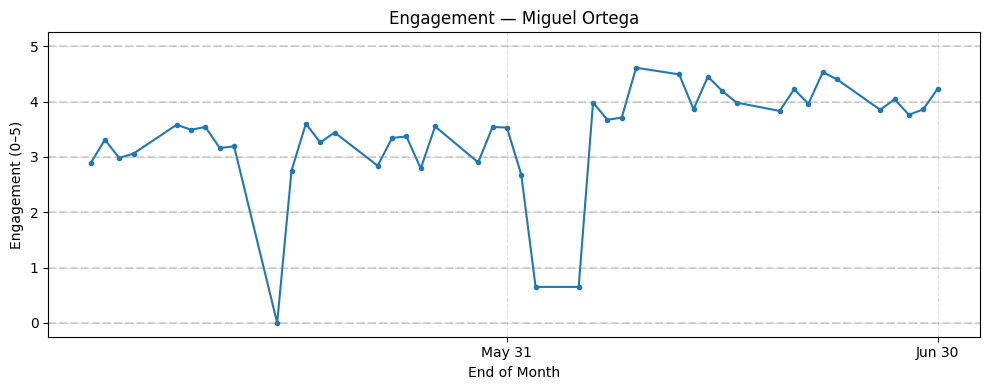

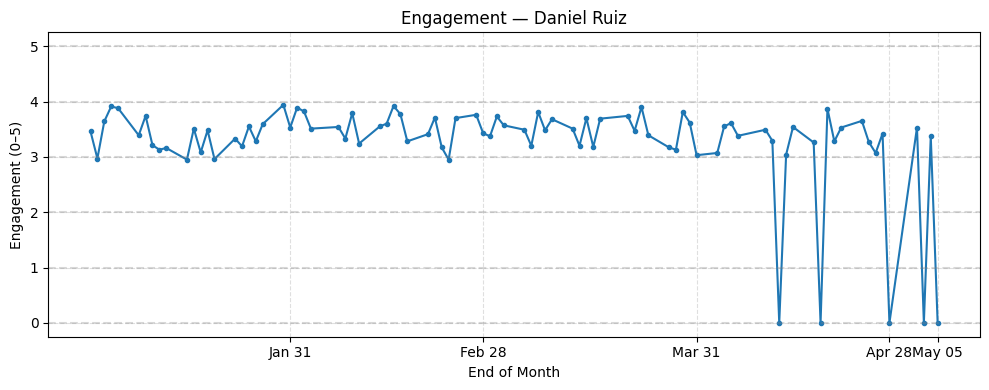

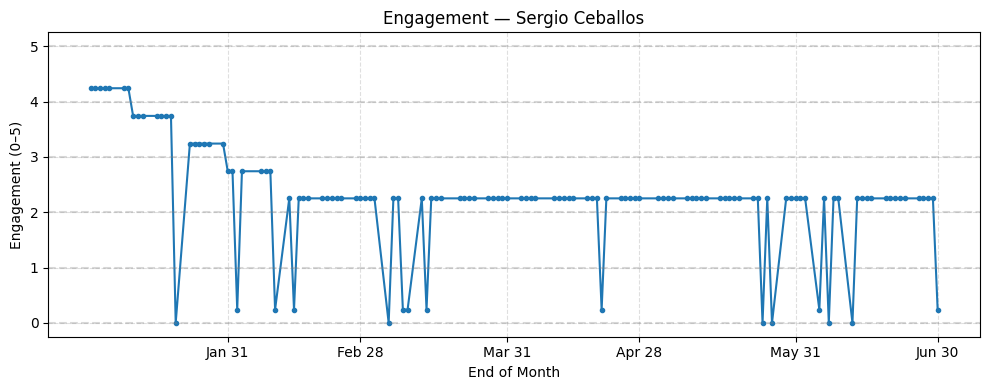

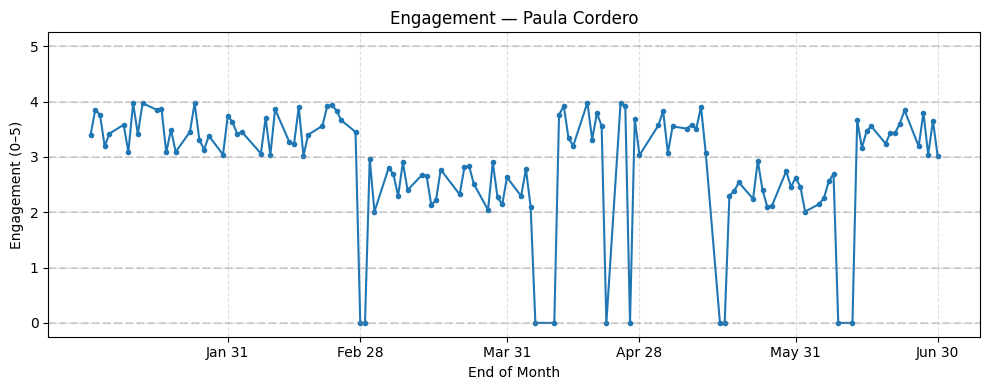

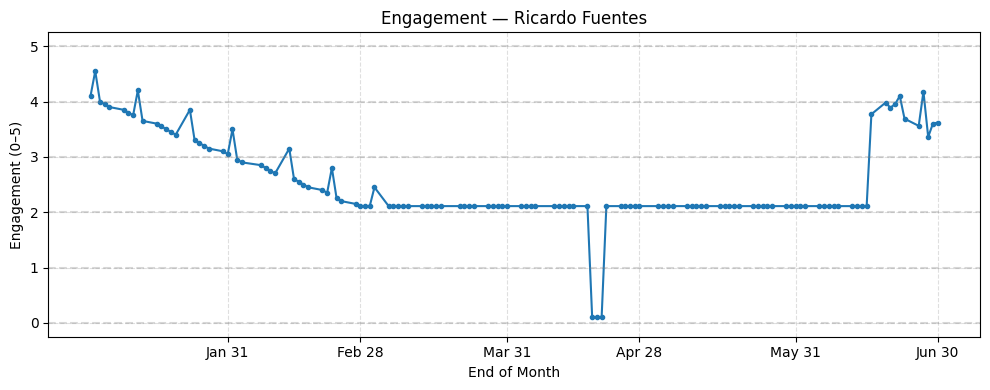

In [ ]:
for name in sample_names:
    
    person_df = df[df["Name"] == name].sort_values("Date")
    
    plt.figure(figsize=(10,4))
    
    # Línea con todos los días
    plt.plot(person_df["Date"], person_df["Engagement"], marker='o', markersize=3)
    
    for lvl in range(6):
        plt.axhline(lvl, color="gray", linestyle="--", alpha=0.3)
    
    ticks = get_end_of_month_dates(person_df["Date"])
    tick_labels = [d.strftime("%b %d") for d in ticks]   

    plt.xticks(ticks, tick_labels)

    plt.title(f"Engagement — {name}")
    plt.xlabel("End of Month")
    plt.ylabel("Engagement (0–5)")
    
    plt.grid(True, linestyle="--", alpha=0.4)
    plt.tight_layout()
    plt.show()